# Hot Canon Ball (Steady State Solve)


![Hot Canon Ball](./images/HotCanonFig.png)

In [1]:
import UWGeodynamics as GEO
import glucifer

loaded rc file /opt/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

In [3]:
velocity = 1.0 * u.centimeter / u.hour
model_length = 2. * u.meter
model_height = 1. * u.meter
minTemp = 300. * u.degK
maxTemp = 1000. * u.degK
bodyforce = 200 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_height
Kt = KL / velocity
KM = bodyforce * KL**2 * Kt**2
KT = maxTemp - minTemp

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM
GEO.scaling_coefficients["[temperature]"] = KT

In [4]:
Model = GEO.Model(elementRes=(128, 128), 
                  minCoord=(-1. * u.meter, -50. * u.centimeter), 
                  maxCoord=(1. * u.meter, 50. * u.centimeter))

In [5]:
Model.diffusivity = 1e-6 * u.metre**2 / u.second 

In [6]:
Model.set_temperatureBCs(top=maxTemp, bottom=minTemp)

In [7]:
Disk = GEO.shapes.Disk(center=(0.,0.), radius=30. * u.centimetre)
Model.temperature.data[Disk.evaluate(Model.mesh)] = GEO.non_dimensionalise(maxTemp)

/usr/local/lib/python3.5/dist-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)



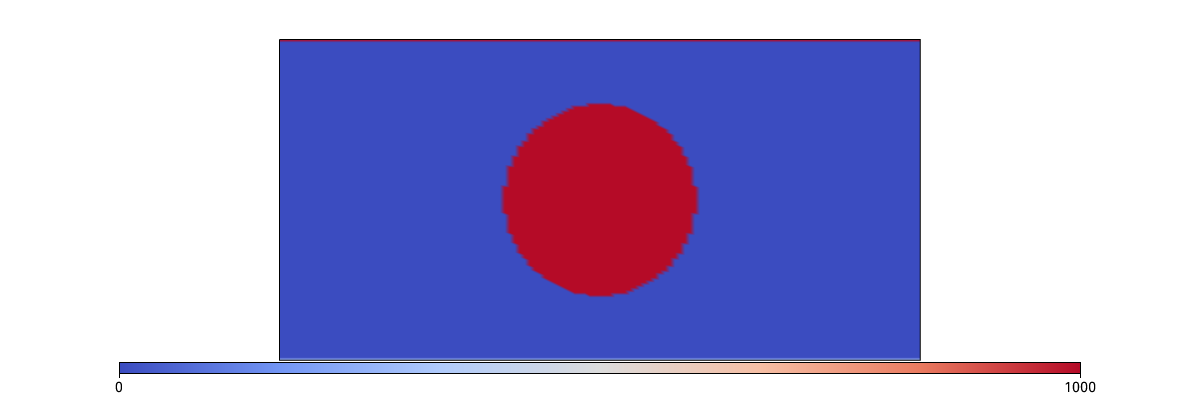

In [8]:
Fig = glucifer.Figure(figsize=(1200,400))
Fig.Surface(Model.mesh, GEO.dimensionalise(Model.temperature, u.degK), colours="coolwarm")
Fig.show()

In [9]:
Model.init_model(temperature=False)

In [10]:
Model.run_for(nstep=2)

Running with UWGeodynamics version 2.8.1-dev-d0ac155(master)


ValueError: Unable to create solver. Provided system not recognised.

/usr/local/lib/python3.5/dist-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)



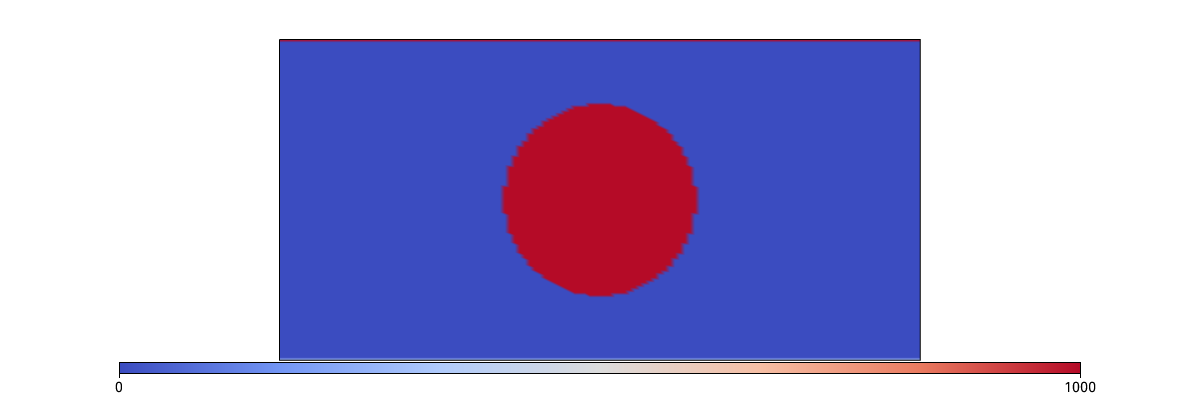

In [15]:
Fig = glucifer.Figure(figsize=(1200,400))
Fig.Surface(Model.mesh, GEO.dimensionalise(Model.temperature, u.degK), colours="coolwarm")
Fig.show()